[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JiayueMa/CUS754_SPRING2024_JiayueMa/blob/Problem_set_03/Problem_set_03.ipynb)

This notebook is part the of Dr. Christoforos Christoforou's course materials. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials or any of their derivatives without the instructor's express written consent.

# Problem Set 03 - Template Matching
**Professor:** Dr. Christoforos Christoforou


In the course, we introduced template matching as one use-case, where we use **filters as feature extractors**. In particular, by using a small image of an object (template image) we want to detect as a kernel, and then calculating the cross-correlation of that kernel with the search image, we can obtain a 2D **intermediate representation** where each entry captures the similarity between the template image to each location of the search image.

Subsequently, by searching for local picks in the **intermediate representation** we are able to identify the specific location the query object is found in the search image.

In this problem set you are expected to practice the concepts covered in class.


## Exercise 1 Template matching using OpenCV

Template matching is a very common and useful technique in computer vision. OpenCV library provides two useful functions that implement template matching and object detections. These are the functions

* `cv2.matchTemplate()` which performs the convolution of the query image with the search image, and
* `cv2.matchTemplate()` which can identify the local maximum in the `intermediate representation`  

As part of this task, you are expected to read the [OpenCV tutorial](
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html) and reproduce the code shown therein.

Show an example, were you use the images provided by openCV and an example where you use your own images.

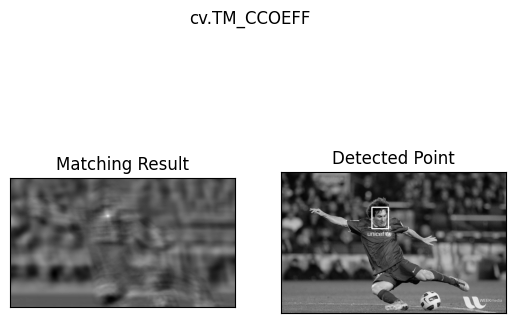

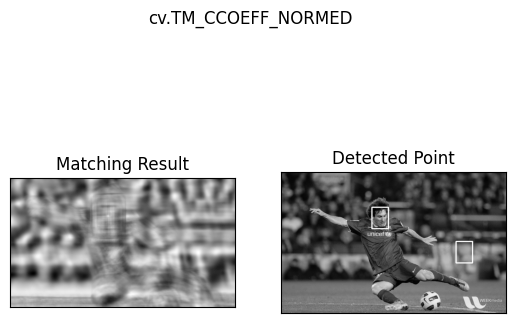

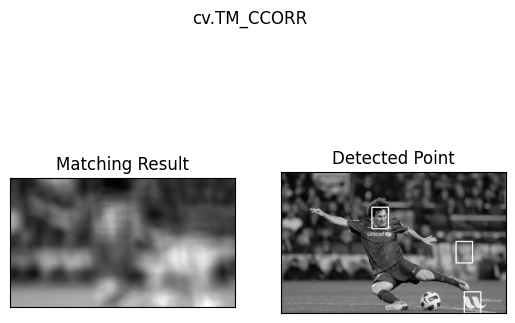

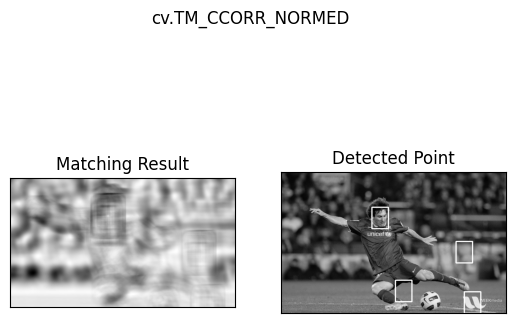

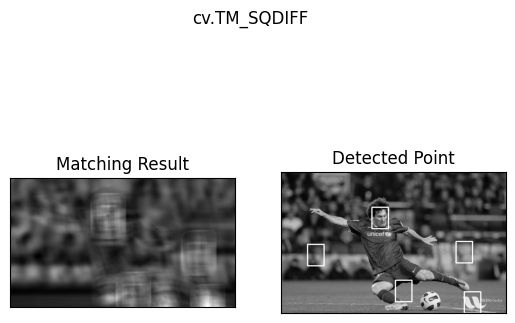

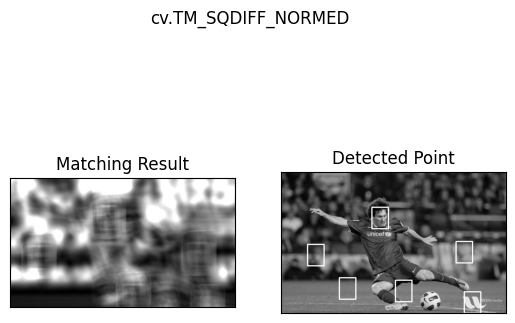

In [6]:
import cv2 as cv
import numpy as np
import urllib.request
from matplotlib import pyplot as plt

def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv.imdecode(image, cv.IMREAD_GRAYSCALE)
    return image

img_url = 'https://images2017.cnblogs.com/blog/1230045/201802/1230045-20180206202249763-1291913372.png'
template_url = 'https://docs.opencv.org/3.4/messi_face.jpg'

img = url_to_image(img_url)
template = url_to_image(template_url)




w, h = template.shape[::-1]

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    method = eval(meth)

    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()



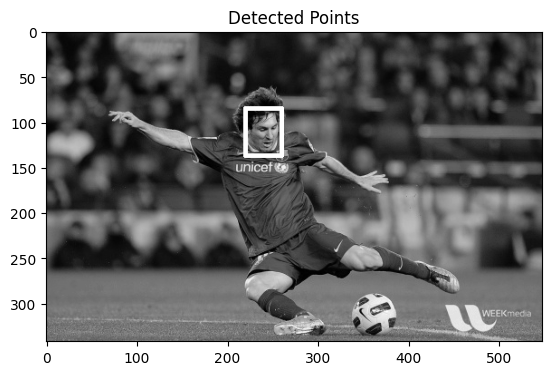

In [8]:
#
# Use this cell to reproduce the tutorial code (Section - Template Matching with Multiple Objects)
#

import cv2 as cv
import numpy as np
import urllib.request
from matplotlib import pyplot as plt

def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv.imdecode(image, cv.IMREAD_GRAYSCALE)
    return image


img_url = 'https://images2017.cnblogs.com/blog/1230045/201802/1230045-20180206202249763-1291913372.png'
template_url = 'https://docs.opencv.org/3.4/messi_face.jpg'
img = url_to_image(img_url)
template = url_to_image(template_url)


w, h = template.shape[::-1]


method = cv.TM_CCOEFF_NORMED


res = cv.matchTemplate(img, template, method)


threshold = 0.8

loc = np.where(res >= threshold)

for pt in zip(*loc[::-1]):  # Switch cols and rows
    cv.rectangle(img, pt, (pt[0] + w, pt[1] + h), 255, 2)

plt.imshow(img, cmap='gray')
plt.title('Detected Points')
plt.show()


## Exercise 2: Template matching from scratch

In this exercise, you will be writing your own function to implement template matching  from scratch. More specifically, you will implement the simplified version of the function `cv2.matchTemplate()`. You function need to perform template matching using normalized correlations (i.e. the method `CV_TM_CCORR_NORMED`). You can find the exact formula for the normalized correlation method [here](https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/template_matching/template_matching.html#how-does-it-work)




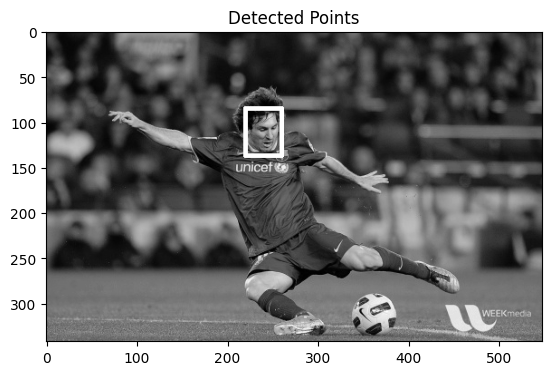

In [7]:
#  https://cdn.britannica.com/79/4479-050-6EF87027/flag-Stars-and-Stripes-May-1-1795.jpg
# Use this cell to implement your own version of matchTempalte() function
#


In [13]:
import numpy as np

def my_template_normed(image, template):

    image = image.astype(np.float32)
    template = template.astype(np.float32)

    i_height, i_width = image.shape
    t_height, t_width = template.shape

    result = np.zeros((i_height - t_height + 1, i_width - t_width + 1))
    template_sqr_sum = np.sum(template**2)

    for y in range(result.shape[0]):
        for x in range(result.shape[1]):
            # Extract the current region of interest in the image
            roi = image[y:y+t_height, x:x+t_width]

            sum_prod = np.sum(roi * template)

            roi_sqr_sum = np.sum(roi**2)

            denominator = np.sqrt(template_sqr_sum * roi_sqr_sum)
            if denominator == 0:
                result[y, x] = 0
            else:
                result[y, x] = sum_prod / denominator

    return result


## Exercise 3: Test your implementation

Demonstrate the correctness of your `my_matchTemplate` function implementation from Exercise 2, by applying it to different images. Compare the output of your function to the corresponding output from when using cv.my_matchTemplate method provided by openCV library (i.e. show the two results side by side). Moreover, report (empirical) time  each method takes to complete (i.e. time both your and openCV implementation).

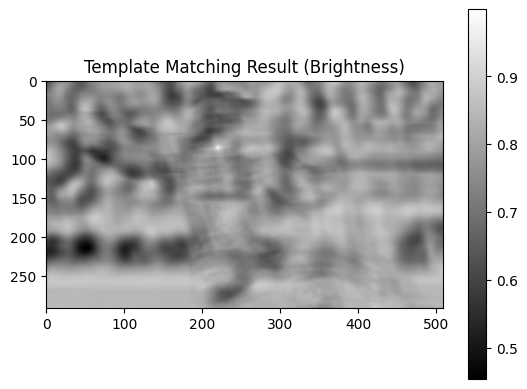

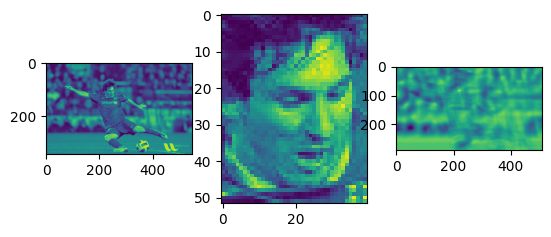

In [22]:
import cv2 as cv
import numpy as np
import urllib.request
from matplotlib import pyplot as plt

def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv.imdecode(image, cv.IMREAD_GRAYSCALE)
    return image

img_url = 'https://images2017.cnblogs.com/blog/1230045/201802/1230045-20180206202249763-1291913372.png'
template_url = 'https://docs.opencv.org/3.4/messi_face.jpg'

img = url_to_image(img_url)
template = url_to_image(template_url)

my_img = my_template_normed(img, template)
plt.imshow(my_img, cmap='gray')
plt.title('Template Matching Result (Brightness)')
plt.colorbar()
plt.show()

plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(template)
plt.subplot(1,3,3)
plt.imshow(my_img)

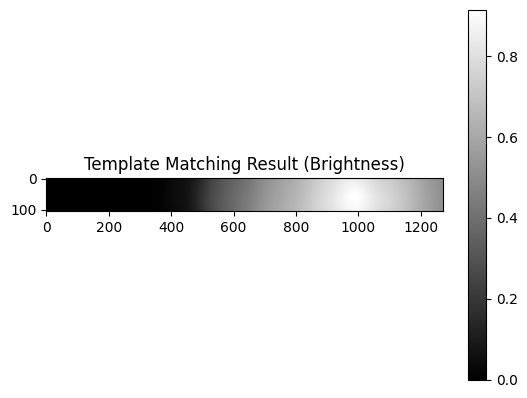

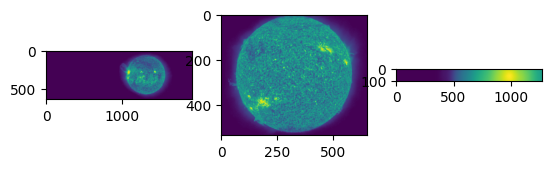

In [21]:
import cv2 as cv
import numpy as np
import urllib.request
from matplotlib import pyplot as plt

def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv.imdecode(image, cv.IMREAD_GRAYSCALE)
    return image

img_url = 'https://science.nasa.gov/wp-content/uploads/2023/05/soho-prominences-1920x640-1.jpg?w=4096&format=jpeg'
template_url = 'https://cdn.mos.cms.futurecdn.net/7JwpfUpwtJMzQnjqPjHAqS-650-80.jpg.webp'

img = url_to_image(img_url)
template = url_to_image(template_url)

my_img = my_template_normed(img, template)
plt.imshow(my_img, cmap='gray')
plt.title('Template Matching Result (Brightness)')
plt.colorbar()
plt.show()

plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(template)
plt.subplot(1,3,3)
plt.imshow(my_img)




Copyright Statement: Copyright © 2020 Christoforou. The materials provided by the instructor of this course, including this notebook, are for the use of the students enrolled in the course. Materials are presented in an educational context for personal use and study and should not be shared, distributed, disseminated or sold in print — or digitally — outside the course without permission. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials as well as any of their derivatives without the instructor's express written consent.